In [15]:
import pandas as pd
from sqlalchemy import create_engine

In [16]:
engine = create_engine('sqlite:///Chinook_Sqlite.sqlite')

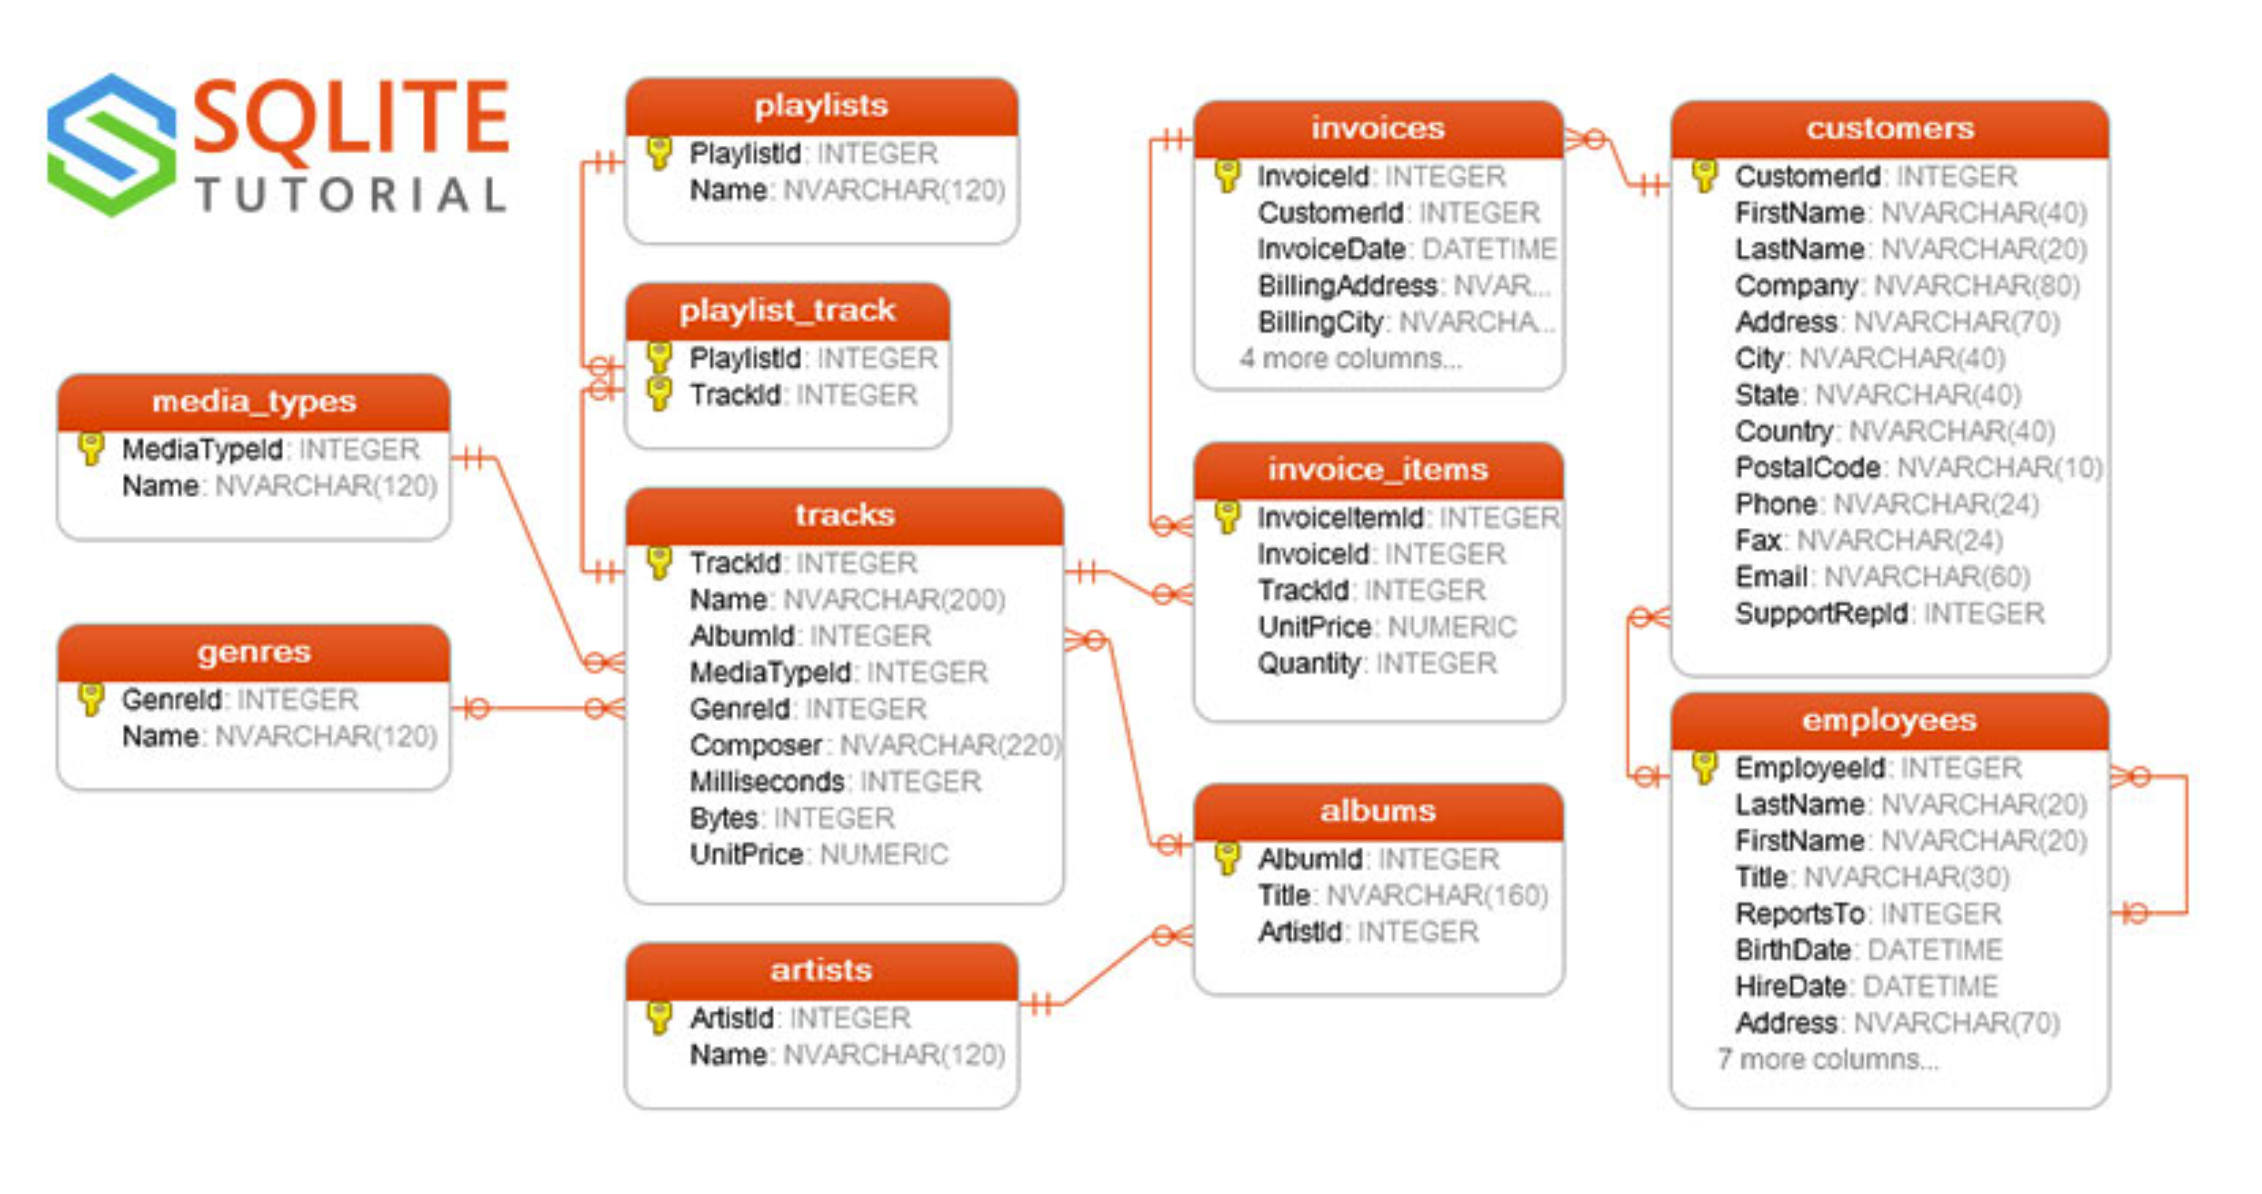

In [17]:
table_names = engine.table_names()

In [18]:
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [19]:
con = engine.connect()

In [36]:
command = """
   PRAGMA table_info(invoice);
"""

In [37]:
pd.read_sql_query(command, con)

,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceId,INTEGER,1,None,1
1,1,CustomerId,INTEGER,1,None,0
2,2,InvoiceDate,DATETIME,1,None,0
3,3,BillingAddress,NVARCHAR(70),0,None,0
4,4,BillingCity,NVARCHAR(40),0,None,0
5,5,BillingState,NVARCHAR(40),0,None,0
6,6,BillingCountry,NVARCHAR(40),0,None,0
7,7,BillingPostalCode,NVARCHAR(10),0,None,0
8,8,Total,"NUMERIC(10,2)",1,None,0


## Filterings

In [58]:
command = """
   SELECT COUNT(*) num_customers
   FROM
    customer
"""
pd.read_sql_query(command, con)

,num_customers
0,59


In [60]:
command = """
SELECT 
 *
FROM
 invoice
LIMIT 5
"""
pd.read_sql_query(command, con)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [99]:
# find the oldest and newest records in invoice

command = """
SELECT 
 MAX(invoicedate) latest,
 MIN(invoicedate) oldest
FROM
 invoice
"""
pd.read_sql_query(command, con)

,latest,oldest
0,2013-12-22 00:00:00,2009-01-01 00:00:00


In [76]:
# select the oldest and newest records from invoice table

command = """
SELECT 
 *
FROM
 invoice
WHERE
 invoicedate= (SELECT MAX(invoicedate) FROM invoice)
OR 
 invoicedate= (SELECT MIN(invoicedate) FROM invoice)
ORDER BY
invoicedate ASC
"""
pd.read_sql_query(command, con)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,412,58,2013-12-22 00:00:00,"12,Community Centre",Delhi,None,India,110017,1.99


In [101]:
# select all records in 2013 with total greater than 10

command = """
SELECT 
 *
FROM
 invoice
WHERE
 strftime('%Y', invoicedate) = '2013'
AND
 total > 10
ORDER BY
invoicedate
"""
pd.read_sql_query(command, con)
#  -- strftime('%Y-%m-%d', invoicedate) = '2013-01-02'

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,334,39,2013-01-07 00:00:00,"4, Rue Milton",Paris,None,France,75009,13.86
1,341,18,2013-02-07 00:00:00,627 Broadway,New York,NY,USA,10012-2612,13.86
2,348,56,2013-03-10 00:00:00,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,13.86
3,355,35,2013-04-10 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,13.86
4,362,14,2013-05-11 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,13.86
5,369,52,2013-06-11 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,13.86
6,376,31,2013-07-12 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,13.86
7,383,10,2013-08-12 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,13.86
8,390,48,2013-09-12 00:00:00,Lijnbaansgracht 120bg,Amsterdam,VV,Netherlands,1016,13.86
9,397,27,2013-10-13 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,13.86


In [102]:
# select all records in 2013 with total greater than 10

command = """
SELECT 
 *
FROM
 invoice
WHERE
 invoicedate BETWEEN '2013-01-01' AND '2013-12-31'
AND
 total > 10
ORDER BY
invoicedate
"""
pd.read_sql_query(command, con)
#  -- strftime('%Y-%m-%d', invoicedate) = '2013-01-02'

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,334,39,2013-01-07 00:00:00,"4, Rue Milton",Paris,None,France,75009,13.86
1,341,18,2013-02-07 00:00:00,627 Broadway,New York,NY,USA,10012-2612,13.86
2,348,56,2013-03-10 00:00:00,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,13.86
3,355,35,2013-04-10 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,13.86
4,362,14,2013-05-11 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,13.86
5,369,52,2013-06-11 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,13.86
6,376,31,2013-07-12 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,13.86
7,383,10,2013-08-12 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,13.86
8,390,48,2013-09-12 00:00:00,Lijnbaansgracht 120bg,Amsterdam,VV,Netherlands,1016,13.86
9,397,27,2013-10-13 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,13.86


In [103]:
# select all records whose billing country is USA

command = """
SELECT 
 *
FROM
 invoice
WHERE
 billingcountry = 'USA'
"""
pd.read_sql_query(command, con)
#  -- strftime('%Y-%m-%d', invoicedate) = '2013-01-02'

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
2,14,17,2009-03-04 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,1.98
3,15,19,2009-03-04 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98
4,16,21,2009-03-05 00:00:00,801 W 4th Street,Reno,NV,USA,89503,3.96
...,...,...,...,...,...,...,...,...,...
86,397,27,2013-10-13 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,13.86
87,405,20,2013-11-21 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,0.99
88,406,21,2013-12-04 00:00:00,801 W 4th Street,Reno,NV,USA,89503,1.98
89,407,23,2013-12-04 00:00:00,69 Salem Street,Boston,MA,USA,2113,1.98


In [106]:
# select all records whose billing country is USA or Canada

command = """
SELECT 
 *
FROM
 invoice
WHERE
 billingcountry in ('USA', 'Canada')
"""
pd.read_sql_query(command, con)
#  -- strftime('%Y-%m-%d', invoicedate) = '2013-01-02'

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
1,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
2,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
3,14,17,2009-03-04 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,1.98
4,15,19,2009-03-04 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98
...,...,...,...,...,...,...,...,...,...
142,405,20,2013-11-21 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,0.99
143,406,21,2013-12-04 00:00:00,801 W 4th Street,Reno,NV,USA,89503,1.98
144,407,23,2013-12-04 00:00:00,69 Salem Street,Boston,MA,USA,2113,1.98
145,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96


## JOINs

In [127]:
command = """
SELECT 
 *
FROM
invoice
"""
pd.read_sql_query(command, con)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [89]:
command = """
SELECT 
 *
FROM
InvoiceLine
"""
pd.read_sql_query(command, con)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [131]:
command = """
SELECT 
 i.invoiceid, il.invoicelineid, i.invoicedate, i.customerid, il.trackid, il.unitprice, il.quantity, i.total
FROM
 invoice i
LEFT JOIN
 invoiceline il
ON
 i.invoiceid = il.invoiceid
WHERE
 i.invoicedate BETWEEN '2013-12-01' AND '2013-12-31'
ORDER BY
il.quantity
DESC
"""
pd.read_sql_query(command, con)

,InvoiceId,InvoiceLineId,InvoiceDate,CustomerId,TrackId,UnitPrice,Quantity,Total
0,406,2203,2013-12-04 00:00:00,21,2946,0.99,1,1.98
1,406,2204,2013-12-04 00:00:00,21,2947,0.99,1,1.98
2,407,2205,2013-12-04 00:00:00,23,2949,0.99,1,1.98
3,407,2206,2013-12-04 00:00:00,23,2951,0.99,1,1.98
4,408,2207,2013-12-05 00:00:00,25,2953,0.99,1,3.96
5,408,2208,2013-12-05 00:00:00,25,2955,0.99,1,3.96
6,408,2209,2013-12-05 00:00:00,25,2957,0.99,1,3.96
7,408,2210,2013-12-05 00:00:00,25,2959,0.99,1,3.96
8,409,2211,2013-12-06 00:00:00,29,2963,0.99,1,5.94
9,409,2212,2013-12-06 00:00:00,29,2967,0.99,1,5.94


In [130]:
command = """
SELECT 
 i.invoiceid, il.invoicelineid, i.invoicedate, i.customerid, il.trackid, il.unitprice, il.quantity, i.total
FROM
 invoiceline il
LEFT JOIN 
 invoice i
ON
 i.invoiceid = il.invoiceid
WHERE
 i.invoicedate BETWEEN '2013-12-01' AND '2013-12-31'
ORDER BY
il.quantity
DESC
"""
pd.read_sql_query(command, con)

,InvoiceId,InvoiceLineId,InvoiceDate,CustomerId,TrackId,UnitPrice,Quantity,Total
0,406,2203,2013-12-04 00:00:00,21,2946,0.99,1,1.98
1,406,2204,2013-12-04 00:00:00,21,2947,0.99,1,1.98
2,407,2205,2013-12-04 00:00:00,23,2949,0.99,1,1.98
3,407,2206,2013-12-04 00:00:00,23,2951,0.99,1,1.98
4,408,2207,2013-12-05 00:00:00,25,2953,0.99,1,3.96
5,408,2208,2013-12-05 00:00:00,25,2955,0.99,1,3.96
6,408,2209,2013-12-05 00:00:00,25,2957,0.99,1,3.96
7,408,2210,2013-12-05 00:00:00,25,2959,0.99,1,3.96
8,409,2211,2013-12-06 00:00:00,29,2963,0.99,1,5.94
9,409,2212,2013-12-06 00:00:00,29,2967,0.99,1,5.94


In [135]:
command = """
SELECT 
 il.invoicelineid, 
 i.invoiceid,
 i.invoicedate, 
 i.customerid, 
 c.firstname,
 c.lastname,
 il.trackid, 
 il.unitprice, 
 il.quantity,
 i.total
 
FROM
 invoiceline il
LEFT JOIN 
 invoice i
ON
 i.invoiceid = il.invoiceid
LEFT JOIN
 customer c
ON 
 i.customerid = c.customerid
WHERE
 i.invoicedate BETWEEN '2013-12-01' AND '2013-12-31'
ORDER BY
il.quantity
DESC
"""
pd.read_sql_query(command, con)

,InvoiceLineId,InvoiceId,InvoiceDate,CustomerId,FirstName,LastName,TrackId,UnitPrice,Quantity,Total
0,2203,406,2013-12-04 00:00:00,21,Kathy,Chase,2946,0.99,1,1.98
1,2204,406,2013-12-04 00:00:00,21,Kathy,Chase,2947,0.99,1,1.98
2,2205,407,2013-12-04 00:00:00,23,John,Gordon,2949,0.99,1,1.98
3,2206,407,2013-12-04 00:00:00,23,John,Gordon,2951,0.99,1,1.98
4,2207,408,2013-12-05 00:00:00,25,Victor,Stevens,2953,0.99,1,3.96
5,2208,408,2013-12-05 00:00:00,25,Victor,Stevens,2955,0.99,1,3.96
6,2209,408,2013-12-05 00:00:00,25,Victor,Stevens,2957,0.99,1,3.96
7,2210,408,2013-12-05 00:00:00,25,Victor,Stevens,2959,0.99,1,3.96
8,2211,409,2013-12-06 00:00:00,29,Robert,Brown,2963,0.99,1,5.94
9,2212,409,2013-12-06 00:00:00,29,Robert,Brown,2967,0.99,1,5.94


In [138]:
command = """
SELECT 
 il.invoicelineid, 
 i.invoiceid,
 i.invoicedate, 
 i.customerid, 
 c.firstname,
 c.lastname,
 em.employeeid,
 em.firstname employee_firstname,
 em.lastname employee_lastname,
 il.trackid, 
 il.unitprice, 
 il.quantity,
 i.total
 
FROM
 invoiceline il
LEFT JOIN 
 invoice i
ON
 i.invoiceid = il.invoiceid
LEFT JOIN
 customer c
ON 
 i.customerid = c.customerid
LEFT JOIN
 Employee em
ON
 c.SupportRepId = em.employeeid
WHERE
 i.invoicedate BETWEEN '2013-12-01' AND '2013-12-31'
ORDER BY
il.quantity
DESC
"""
pd.read_sql_query(command, con)

,InvoiceLineId,InvoiceId,InvoiceDate,CustomerId,FirstName,LastName,EmployeeId,employee_firstname,employee_lastname,TrackId,UnitPrice,Quantity,Total
0,2203,406,2013-12-04 00:00:00,21,Kathy,Chase,5,Steve,Johnson,2946,0.99,1,1.98
1,2204,406,2013-12-04 00:00:00,21,Kathy,Chase,5,Steve,Johnson,2947,0.99,1,1.98
2,2205,407,2013-12-04 00:00:00,23,John,Gordon,4,Margaret,Park,2949,0.99,1,1.98
3,2206,407,2013-12-04 00:00:00,23,John,Gordon,4,Margaret,Park,2951,0.99,1,1.98
4,2207,408,2013-12-05 00:00:00,25,Victor,Stevens,5,Steve,Johnson,2953,0.99,1,3.96
5,2208,408,2013-12-05 00:00:00,25,Victor,Stevens,5,Steve,Johnson,2955,0.99,1,3.96
6,2209,408,2013-12-05 00:00:00,25,Victor,Stevens,5,Steve,Johnson,2957,0.99,1,3.96
7,2210,408,2013-12-05 00:00:00,25,Victor,Stevens,5,Steve,Johnson,2959,0.99,1,3.96
8,2211,409,2013-12-06 00:00:00,29,Robert,Brown,3,Jane,Peacock,2963,0.99,1,5.94
9,2212,409,2013-12-06 00:00:00,29,Robert,Brown,3,Jane,Peacock,2967,0.99,1,5.94


In [145]:
# calculate the total sale of each customer rep from btw time xxx and xxx

command = """
SELECT 
 em.employeeid,
 em.firstname employee_firstname,
 em.lastname employee_lastname,
 SUM(i.total) total_sale
FROM
 invoice i
LEFT JOIN
 customer c
ON 
 i.customerid = c.customerid
LEFT JOIN
 Employee em
ON
 c.SupportRepId = em.employeeid
WHERE
 i.invoicedate BETWEEN '2009-12-01' AND '2013-12-31'
GROUP BY
 em.Employeeid
ORDER BY
total_sale
DESC
"""
pd.read_sql_query(command, con)

,EmployeeId,employee_firstname,employee_lastname,total_sale
0,3,Jane,Peacock,719.19
1,4,Margaret,Park,625.91
2,5,Steve,Johnson,571.66


In [149]:
# calculate the total number of customers each employee has.
command = """
SELECT 
 em.employeeid,
 em.firstname employee_firstname,
 em.lastname employee_lastname,
 COUNT(DISTINCT c.customerid) num_customers
FROM
 Employee em
LEFT JOIN
 customer c
ON
 c.SupportRepId = em.employeeid
GROUP BY
 em.Employeeid
ORDER BY 
 num_customers DESC
"""
pd.read_sql_query(command, con)

,EmployeeId,employee_firstname,employee_lastname,num_customers
0,3,Jane,Peacock,21
1,4,Margaret,Park,20
2,5,Steve,Johnson,18
3,1,Andrew,Adams,0
4,2,Nancy,Edwards,0
5,6,Michael,Mitchell,0
6,7,Robert,King,0
7,8,Laura,Callahan,0
